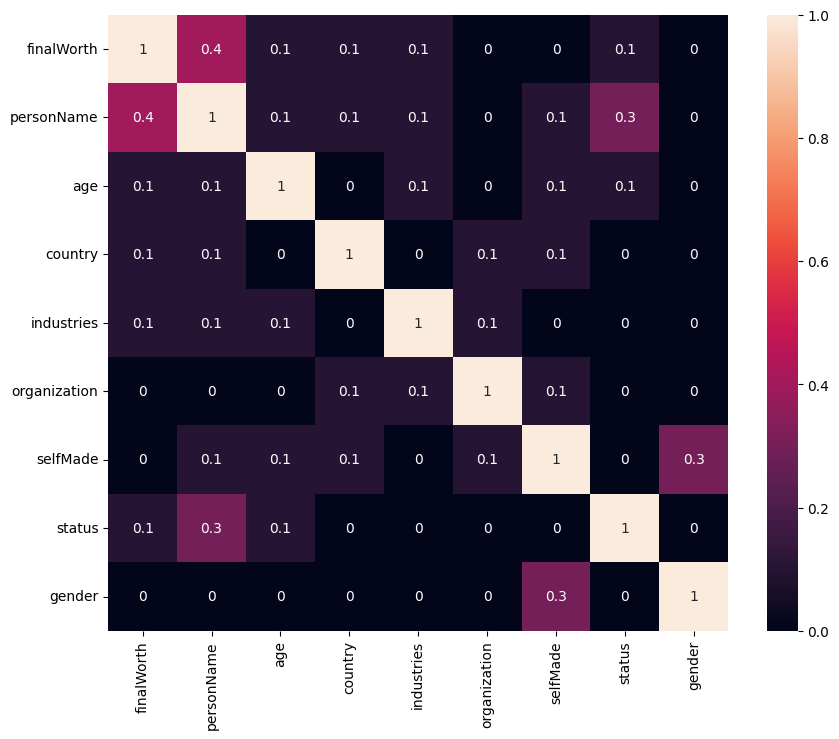

Точность модели = 0.09320388349514563


In [7]:
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

start_dataset = pd.read_csv("Billionaires Statistics Dataset.csv", encoding="latin-1")
COLUMN_NAME = 'country'

coloums_target = ["finalWorth", "personName", "age", "country", "industries", "organization", "selfMade", "status", "gender"]

dataset = start_dataset[coloums_target].copy()


for column in dataset:
    if dataset[column].dtype == 'object':
        dataset[column] = pd.factorize(dataset[column])[0]
plt.figure(figsize=(10, 8))
sns.heatmap(
    round(
        abs(dataset.corr()),
        1,
    ),
    annot=True,
)
plt.show()


dataset.dropna(inplace=True)
dataset.reset_index(drop=True, inplace=True)

train_input, test_input, train_output, test_output = train_test_split(
    dataset.drop(COLUMN_NAME, axis=1),
    dataset[COLUMN_NAME],
    test_size=0.4
)

model = GaussianNB()
model.fit(train_input, train_output)
prediction = model.predict(test_input)
accuracy = metrics.accuracy_score(prediction, test_output)
print(f'Точность модели = {accuracy}')

In [10]:
dataset.drop(dataset.index[0:4])
dataset.reset_index(drop=True, inplace=True)
dataset = dataset.drop("age", axis=1)
dataset

,finalWorth,personName,country,industries,organization,selfMade,status,gender
0,211000,0,0,0,0,False,0,0
1,180000,1,1,1,1,True,1,0
2,114000,2,1,2,2,True,1,0
3,107000,3,1,2,3,True,0,0
4,106000,4,1,3,4,True,1,0
...,...,...,...,...,...,...,...,...
2570,1000,2633,5,14,-1,True,1,0
2571,1000,2634,1,7,-1,False,4,0
2572,1000,2635,5,10,-1,True,5,0
2573,1000,2636,5,11,-1,True,1,0
